In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
from src.modeling.queries import CHURNED_AGE_QUERY, CHURNED_EVENT_QUERY
from src.database.sql import psql_connection
conn = psql_connection()

In [3]:
events_df = pd.read_sql_query(CHURNED_EVENT_QUERY, conn)

events_df = events_df.pivot(index='distinct_id', columns='type', values='count')
events_df = events_df.fillna(0)

In [35]:
age_df = pd.read_sql_query(CHURNED_AGE_QUERY, conn, index_col='distinct_id')
vertical_dummies = pd.get_dummies(age_df['vertical'], prefix='vertical')
age_df = pd.concat([age_df, vertical_dummies], axis=1)

In [36]:
df = events_df.join(age_df, how='inner')

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

train_df = df.copy()
clf = GradientBoostingClassifier(
    learning_rate=0.001,
    n_estimators=2500,
    max_depth=12,
    max_features='sqrt',
)
y = train_df['churned'].values
train_df.drop(['churned', 'vertical', 'cancel', 'Client error', 'Land on Homepage', 'Click Link'], axis=1, inplace=True)
features = train_df.columns
X = train_df.values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf.fit(X_train, y_train)
print "Model Score: {}".format(clf.score(X_test, y_test))
print "Top Features:"

for feature, importance in sorted(zip(features, clf.feature_importances_), key=lambda t: t[1], reverse=True):
    print "{} \t {:.2} \n".format(feature, importance)
    

Model Score: 0.929292929293
Top Features:
account_age 	 0.44 

camp_deliveries 	 0.11 

Slide start 	 0.061 

Editor Opened 	 0.038 

signin 	 0.035 

Ended Onboarding 	 0.03 

Deck Created 	 0.027 

Started Onboarding 	 0.025 

Sign In 	 0.024 

vertical_educator 	 0.021 

Export 	 0.021 

Export PPT 	 0.02 

View player page 	 0.014 

Privacy 	 0.013 

App Became Active 	 0.013 

vertical_marketing 	 0.011 

Share 	 0.0088 

vertical_student 	 0.0084 

Land on Pricing Page 	 0.0071 

Land on Education Page 	 0.006 

vertical_sales 	 0.0056 

Land on Zuru Page 	 0.0051 

vertical_other 	 0.0047 

Set Privacy Public 	 0.0046 

vertical_professional 	 0.0043 

Land on Checkout Page 	 0.0043 

vertical_coach 	 0.0039 

Set Privacy Restricted 	 0.0038 

Start 	 0.0035 

Display Limit Notification 	 0.0028 

vertical_real_estate 	 0.0028 

Display Video Editor Modal 	 0.0027 

Land on Classroom Page 	 0.0026 

vertical_hr 	 0.0023 

vertical_health 	 0.0022 

New Deck 	 0.0019 

vertical_s

In [9]:
import matplotlib.pyplot as plt
% matplotlib inline

In [10]:
churned_df = df[df['churned'] == True]
non_churned_df = df[df['churned'] == False]

In [43]:
def plot_metric_comparison(metric, churn_label='Churned', non_churn_label='Non-Churned', xlim=None, bins=None):
    fig, ax = plt.subplots()
    print churned_df[metric].describe()
    ax.hist(churned_df[metric], bins=bins, label=churn_label)
    print non_churned_df[metric].describe()
    ax.hist(non_churned_df[metric], bins=bins, label=non_churn_label)
    if xlim:
        ax.set_xlim(xlim)
    ax.legend()
    plt.show()

count    1664.000000
mean       29.315505
std        39.272988
min         0.000000
25%         7.000000
50%         7.000000
75%        38.000000
max       250.000000
Name: account_age, dtype: float64
count    1502.000000
mean      137.112517
std        78.160344
min         9.000000
25%        72.000000
50%       129.000000
75%       205.000000
max       275.000000
Name: account_age, dtype: float64


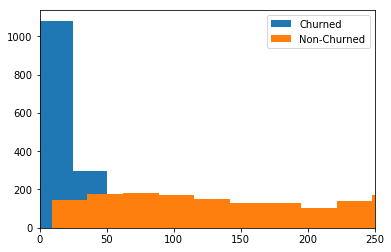

In [44]:
plot_metric_comparison('account_age', xlim=(0,250))

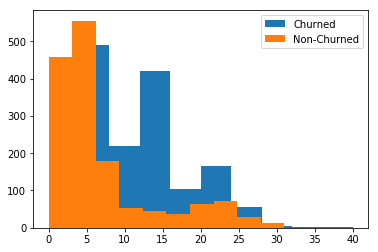

In [13]:
plot_metric_comparison('camp_deliveries')

count    1664.000000
mean        1.256010
std         4.755283
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       119.000000
Name: Export PPT, dtype: float64
count    1502.000000
mean        3.768309
std         9.574887
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       192.000000
Name: Export PPT, dtype: float64


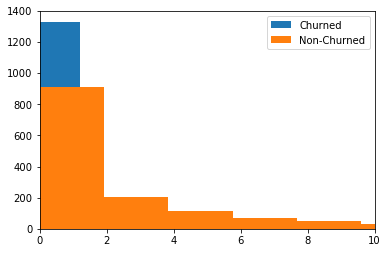

In [45]:
plot_metric_comparison('Export PPT', xlim=(0,10), bins=100)

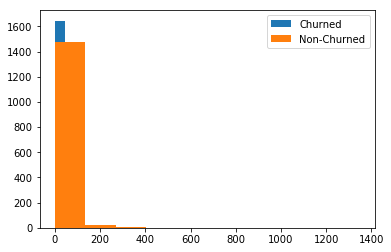

In [42]:
plot_metric_comparison('Editor Opened')